In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [4]:
print(dataset.data[:10])
dataset.data.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


(150, 4)

In [5]:
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(dataset.target, dataset.target_names)
dataset.target.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


(150,)

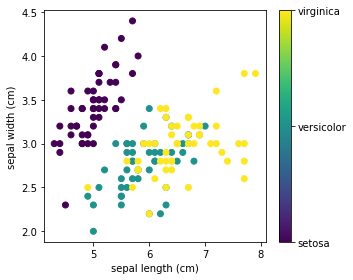

In [7]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# Making Predictions
lr.predict(x_test)
y_pred = lr.predict(x_test)
print(y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

[-9.06206369e-02  9.83817126e-03  1.83525078e+00  9.86763693e-01
  1.12223895e+00  2.11377638e+00  1.65832381e-01  1.03032678e+00
  1.70396541e+00  1.68781195e+00  1.64547639e+00 -5.91547431e-02
  1.82108400e+00  1.55177692e+00  1.66978978e+00  1.10535909e+00
  1.88854122e+00  1.12103650e+00  1.70396541e+00 -8.91960274e-02
  1.87194240e+00  1.26830744e+00  1.01669739e-01  1.58665181e+00
  1.22976965e+00  2.26302460e-01  1.09667090e+00  1.30371059e+00
  1.58047961e+00  1.79568257e+00  1.34939881e+00  8.87754560e-01
  1.26011911e+00 -8.57586256e-02  1.29136284e+00  1.17485433e-04
  1.58775696e-02  9.80699230e-01  9.17992936e-01  1.43144748e+00
  1.94451426e+00  1.58872014e+00  1.59615368e+00  1.02907212e+00
  1.88621899e+00]
Mean Squared Error: 0.06334129646114041


In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred, y_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

[0 0 2 1 1 2 0 1 2 2 2 0 2 1 2 1 2 1 2 0 2 1 0 2 1 0 1 1 2 2 2 1 1 0 1 0 0
 1 1 2 2 2 2 1 2] [0 0 2 1 1 2 0 1 2 2 2 0 2 2 2 1 2 1 2 0 2 1 0 2 1 0 1 1 2 2 2 1 1 0 1 0 0
 1 1 2 2 2 2 1 2]
0.9777777777777777


## Task 1. Print all the values and classes of dataset entries from 42 to 55 and 79 to 84. After that, print out only the "petal length" values of those entries separately. Then, code a list which contains only the entries with a sepal length higher than 7

In [13]:
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [76]:
#Task 1
# print('The names of target classes:', dataset)
print('The names of target classes:', dataset.target_names, '\n')
print('All values: \n', dataset.data, '\n')
print('Values from 42 to 55: \n', dataset.data[42:55], '\n')
print('Values from 79 to 84: \n', dataset.data[79:84], '\n')

custom_dataset = np.append(dataset.data[42:55], dataset.data[79:84], axis=0)
print('Values from 42 to 55 and 79 to 84: \n', custom_dataset, '\n')

print('The names of the dataset columns :', dataset.feature_names, '\n')
print('The "petal length" values 42-55: ', dataset.data[42:55, 2])
print('The "petal length" values 79-84: ', dataset.data[79:84, 2])
print('The "petal length" values 42-55 and 79-84:', custom_dataset[:,2])
print()
k = 7
filtered_lst = np.array([i for i in dataset.data if i[0] > k])
print('The "sepal length" values > 7: \n', filtered_lst)

The names of target classes: ['setosa' 'versicolor' 'virginica'] 

All values: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3

## Task 2. Plot 3 feature comparison graphs (as shown before),  which are 
a)Sepal width to Petal length. 
b)Petal length to petal width 
c)Sepal length to Petal length


The names of the dataset columns : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

a) Sepal width to Petal length:



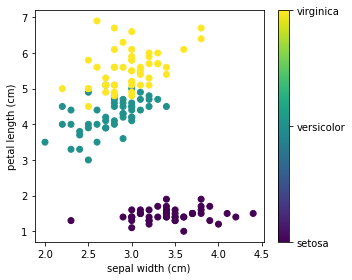

b) Petal length to petal width:



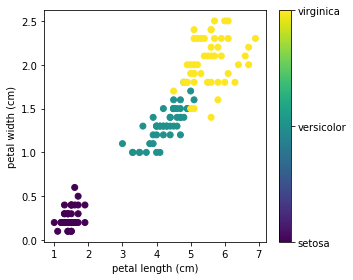

c) Sepal length to Petal length:



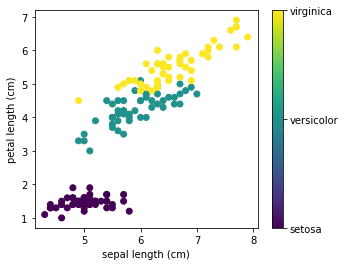

In [121]:
#Task 2
print('The names of the dataset columns :', dataset.feature_names, '\n')

print('a) Sepal width to Petal length:\n')
x_index = 1
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

print('b) Petal length to petal width:\n')
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

print('c) Sepal length to Petal length:\n')
x_index = 0
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.show()

## Task 3. Split the dataset in a 50/50 manner for test and train. Use Linear regression classifier for training. Calculate + print Mean Squared Error and Mean Absolute error


In [126]:
#Task 3
#Split the dataset in a 50/50 manner
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.5)
print('Train dataset:', x_train.shape, y_train.shape)
print('Test dataset:', x_test.shape, y_test.shape)

# Use Linear regression classifier for training
lr = LinearRegression()
lr.fit(x_train, y_train)
print('LinearRegression coefficients:', lr.coef_)

# Making Predictions
lr.predict(x_test)
y_pred = lr.predict(x_test)

lr_res_compare = np.array(list(zip(y_test, y_pred)))
print(lr_res_compare)

# Calculate + print Mean Squared Error and Mean Absolute error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Train dataset: (75, 4) (75,)
Test dataset: (75, 4) (75,)
LinearRegression coefficients: [-0.15446455  0.01744548  0.2495074   0.63098225]
[[ 1.          1.30450245]
 [ 1.          1.19969462]
 [ 1.          0.909707  ]
 [ 2.          2.01477901]
 [ 1.          0.91557615]
 [ 2.          1.79976774]
 [ 2.          2.1668892 ]
 [ 2.          1.77957711]
 [ 1.          1.12427991]
 [ 0.         -0.10520236]
 [ 2.          2.00531611]
 [ 2.          1.87393713]
 [ 0.          0.17408298]
 [ 0.         -0.01900259]
 [ 1.          0.86754957]
 [ 0.          0.01555708]
 [ 0.          0.02096246]
 [ 2.          2.0100032 ]
 [ 1.          1.21991688]
 [ 1.          1.64699065]
 [ 2.          1.5936731 ]
 [ 2.          1.79166481]
 [ 0.         -0.00764911]
 [ 1.          0.83827086]
 [ 1.          1.45658694]
 [ 0.         -0.11256158]
 [ 1.          1.1814676 ]
 [ 1.          0.93592876]
 [ 2.          1.74888756]
 [ 2.          2.21921212]
 [ 0.         -0.02021628]
 [ 1.          1.1779785 

## Task 4. Test KNN for k in range 1 to 35 for the test and train data from Task 3. Plot the accuracy graph (accuracy with respect to the number of nearest neighbours). Record any additional observations with a python comment
Hint: for each k save the accuracy scores in a list. 

n_neighbors = 1
[[2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]
Accuracy Score: 1.0

n_neighbors = 2
[[2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [0 0]
 

 [1 1]]
Accuracy Score: 0.92



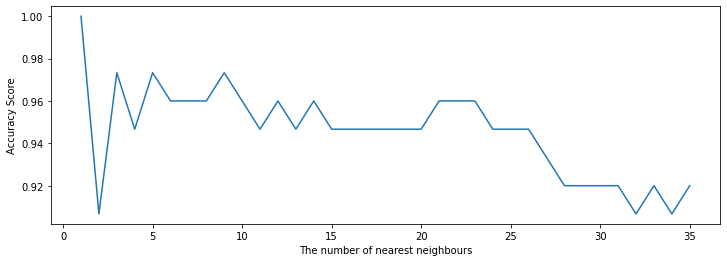

In [125]:
#Task 4
k_accuracy = []

for k in range(1, 35+1):
    print('n_neighbors =', k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(np.array(list(zip(y_pred, y_test))))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)
    print()
    k_accuracy.append(accuracy)

# Plot the accuracy graph (accuracy with respect to the number of nearest neighbours).    
# print(k_accuracy)
plt.figure(figsize=(12, 4))
plt.plot(range(1, 35+1), k_accuracy)
plt.xlabel('The number of nearest neighbours')
plt.ylabel('Accuracy Score')
plt.show()

##Task 5. Explain the differences in the prediction output (if any) between the linear and KNN classifier

#Task 5.
The vital difference in the results is that the linear regression return float numbers (infinite options). 
The k-NN return integer number (discrete values from a given list - Possible options).